In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns


import graphviz
import pydotplus
from sklearn.tree import export_graphviz
import io
from scipy import misc
import scipy.misc
scipy.misc.imread
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/yanhewu/Documents/git/SpotifySongAttributes/Dataset/data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
print("Training size: {}; Test Size: {}".format(len(train), len(test)))

Training size: 1714; Test Size: 303


In [8]:
# custom color palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [9]:
train.shape

(1714, 17)

In [10]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']

pos_dance = data[data['target']==1]['danceability']
neg_dance = data[data['target']==0]['danceability']

pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']

pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']

pos_speechiness = data[data['target']==1]['speechiness']
neg_speechiness = data[data['target']==0]['speechiness']

pos_valence = data[data['target']==1]['valence']
neg_valence = data[data['target']==0]['valence']

pos_energy = data[data['target']==1]['energy']
neg_energy = data[data['target']==0]['energy']

pos_acousticness = data[data['target']==1]['acousticness']
neg_acousticness = data[data['target']==0]['acousticness']

pos_key = data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']

pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness = data[data['target']==0]['instrumentalness']

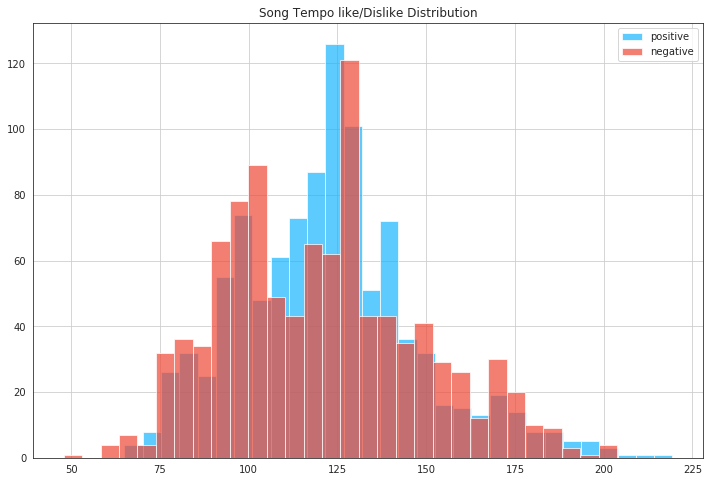

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo like/Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc = "upper right")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


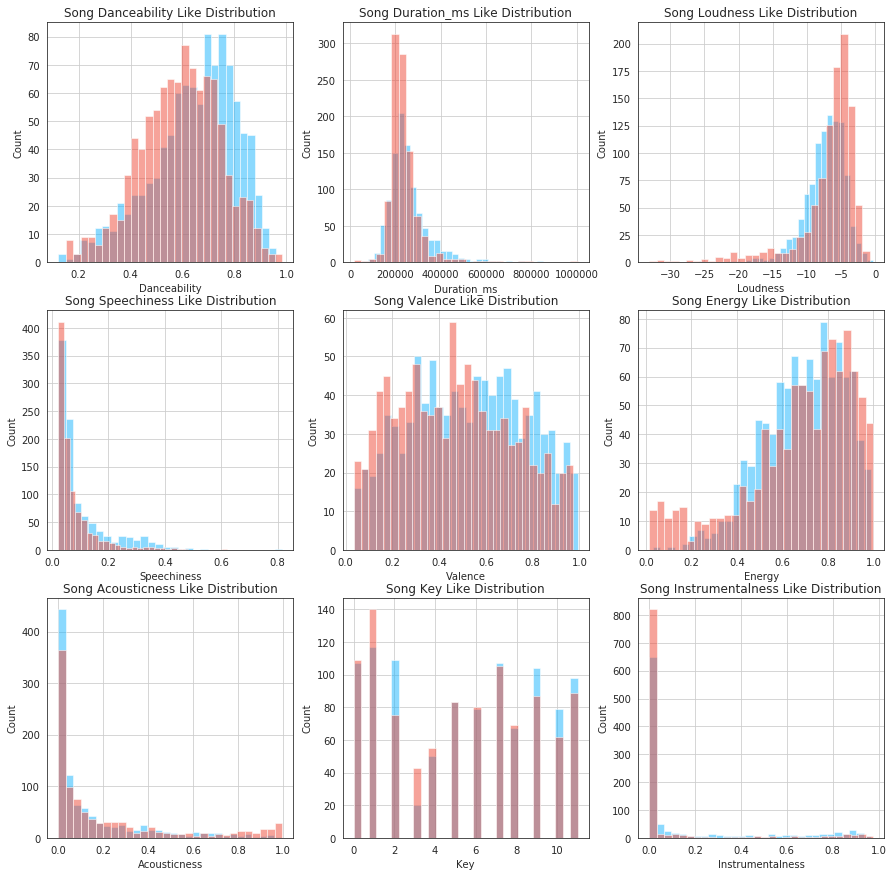

In [12]:
fig2=plt.figure(figsize=(15,15))

#danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

#duration_ms
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration_ms')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration_ms Like Distribution')
pos_duration.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

#loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

#speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

#valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha=0.5, bins=30)
ax11 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

#energy
ax12 = fig2.add_subplot(336)
ax12.set_xlabel('Energy')
ax12.set_ylabel('Count')
ax12.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha=0.5, bins=30)
ax13 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

#acousticness
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Acousticness')
ax14.set_ylabel('Count')
ax14.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha=0.5, bins=30)
ax15 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

#key
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Key')
ax16.set_ylabel('Count')
ax16.set_title('Song Key Like Distribution')
pos_key.hist(alpha=0.5, bins=30)
ax17 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

#instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentalness')
ax18.set_ylabel('Count')
ax18.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax19 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

In [13]:
c = DecisionTreeClassifier(min_samples_split=100)

In [14]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness","speechiness","duration_ms"]

In [15]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [16]:
dt = c.fit(x_train, y_train)

In [17]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


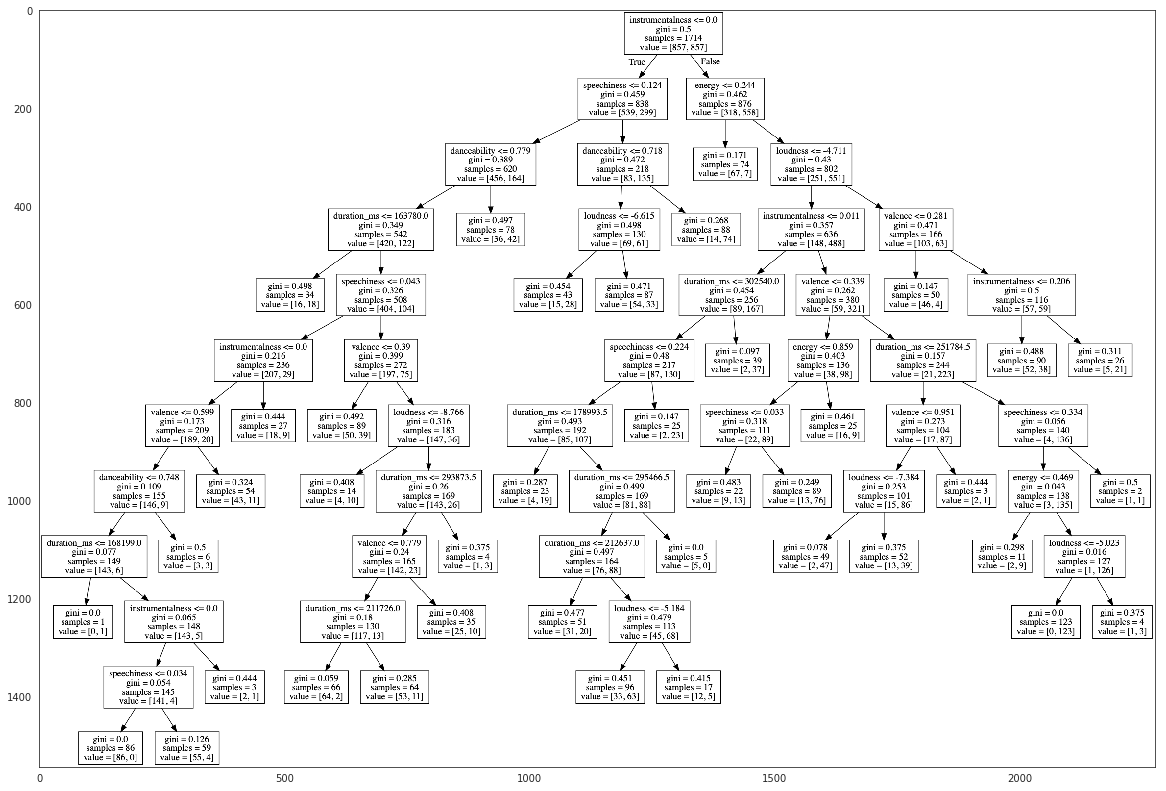

In [18]:
show_tree(dt, features, 'dec_tree_01.png')